<a href="https://colab.research.google.com/github/Sunnykumar9588/Web-Scraping/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Web Scraping on Naukri.com

#Project - Individual
# Name : Sunny Kumar



## Github

https://github.com/Sunnykumar9588/Web-Scraping.git

#Overview:

Data Science Job Insights is a comprehensive tool designed to assist data science professionals, job seekers, and recruiters in navigating the dynamic field of data science job opportunities. This tool utilizes advanced web scraping methods and data analysis to collect, assess, and present data science job postings from diverse online platforms. Its goal is to offer valuable information about job demand trends, geographical distribution, salary fluctuations, preferred qualifications, and emerging skill requirements for a better understanding of the industry.

# Key Features:
1. **Adaptable Web Scraping:**
   - Dynamic Website Adaptation: The tool will intelligently adapt to evolving website structures, ensuring it consistently collects job listings as websites change.

   - Multi-Platform Scraping: It scrapes data science job postings from various online platforms, such as LinkedIn Jobs, Indeed, Naukri, Glassdoor, and AngelList, with customizable platform selection.

   - Scheduled Updates: Implement a scheduled job scraping feature to maintain up-to-date data.

2. **Data Symphony:**
   - Data Extraction: Extract critical information from job listings, including job titles, company names, job descriptions, qualifications, salaries, locations, and application deadlines.

   - Data Cleansing: Clean the extracted data to eliminate duplicates, inconsistencies, and irrelevant information.

   - Data Organization: Store the extracted data in a structured database for efficient retrieval and analysis.

3. **Market Wizardry:**
   - Demand Insights: Analyze job posting data to uncover data science job demand trends, including industries with increasing demand, preferred qualifications, and emerging job roles.

   - Geographic Distribution: Visualize job opportunities geographically, highlighting areas with the highest concentrations of data science jobs.

   - Salary Analysis: Create visualizations illustrating salary variations based on experience, location, and job type, aiding users in understanding salary differences in various regions and industries.

   - Preferred Qualifications: Identify the most common qualifications and skills mentioned in job listings, aiding job seekers in understanding what skills are in high demand.

   - Emerging Skills: Employ natural language processing (NLP) techniques to pinpoint emerging skills and technologies mentioned in job descriptions.

4. **Visual Magic:**
   - Interactive Dashboards: Develop interactive dashboards featuring charts, graphs, and visual representations to offer users a comprehensive view of the job market. Users can filter data by location, experience level, or industry.

   - Job Search and Alerts: Enable users to search for specific job titles, locations, or companies, and set up email alerts for new job listings matching their criteria.

# Technology Stack:
- **Web Scraping:** Utilizes Python with libraries like Scrapy and BeautifulSoup for efficient web scraping.

- **Data Storage:** Structured data is stored in either MySQL or PostgreSQL databases.

- **Data Analysis:** Employs Python with libraries such as Pandas, Matplotlib, and Seaborn for thorough data analysis and visualizations.

- **Web Application:** The user-friendly web interface is built using either Flask or Django for robust web application development.

- **Frontend:** HTML, CSS, and JavaScript are employed to create interactive and responsive visualizations, enhancing the user experience.

- **Hosting:** The application can be hosted on cloud platforms like AWS, Azure, or Heroku for scalability and accessibility.

# Impact:
DataScienceJobTracker delivers significant benefits to the data science community:

1. **Empowering Professionals:** DataScienceJobTracker provides real-time insights into the data science job market, empowering professionals to make informed career decisions.

2. **Enhancing Job Seeker Success:** Job seekers benefit from easy access to relevant job listings and emerging skill trends, increasing their chances of securing their desired positions.

3. **Supporting Recruiters:** Recruiters stay informed about industry trends, enabling them to identify the most qualified candidates for their organizations.

4. **Bridging the Gap:** The tool's data-driven approach serves as a bridge between job seekers and employers, ultimately benefiting the data science community as a whole.

5. **Room for Expansion:** DataScienceJobTracker not only meets the challenge's core objectives but also has the potential for continuous improvement and expansion to cater to the ever-evolving data science job landscape, ensuring long-term relevance and utility.






## Project Objective

The objective of this scraping project is to extract job postings from Naukri.com, a job aggregator website. This will be achieved through the use of Python libraries such as requests, BeautifulSoup, and Selenium. The project aims to collect relevant job data from Naukri.com, allowing for further analysis or integration into a broader data science or job tracking tool.



## Let's Begin!

In [ ]:
!pip install selenium
!pip install parsel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from bs4 import BeautifulSoup
import time


In [ ]:
df = pd.DataFrame(columns=['Title','Company','Ratings','Reviews','Experience','Salary','Location','Job_Post_History','URL'])

In [ ]:
df.shape

(0, 9)

In [ ]:
df.head()

,Title,Company,Ratings,Reviews,Experience,Salary,Location,Job_Post_History,URL


In [ ]:
for param in range(1,11):
    url = "https://www.naukri.com/financial-analyst-jobs-in-mumbai-param?k=financial%20analyst&l=mumbai"

    driver = webdriver.Chrome("D:\\Selenium\\chromedriver.exe")
    driver.get(url)

    time.sleep(10)

    soup = BeautifulSoup(driver.page_source,'html5lib')

    # print(soup.prettify())

    driver.close()

    results = soup.find(class_='list')
    job_elems = results.find_all('article',class_='jobTuple bgWhite br4 mb-8')

    for job_elem in job_elems:

        # URL to apply for the job
        URL = job_elem.find('a',class_='title fw500 ellipsis').get('href')
        # print(URL.strip())

        # Post Title
        Title = job_elem.find('a',class_='title fw500 ellipsis')

        # Company Name
        Company = job_elem.find('a',class_='subTitle ellipsis fleft')

        # Ratings
        rating_span = job_elem.find('span',class_='starRating fleft dot')
        if rating_span is None:
            continue
        else:
            Ratings = rating_span.text

        # Reviews Counts
        Review_span = job_elem.find('a',class_='reviewsCount ml-5 fleft blue-text')
        if Review_span is None:
            continue
        else:
            Reviews = Review_span.text

        # Years of experience Required
        Exp = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi experience')
        Exp_span = Exp.find('span',class_='ellipsis fleft fs12 lh16')
        if Exp_span is None:
            continue
        else:
            Experience = Exp_span.text

        # Salary offered for the job
        Sal = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi salary')
        Sal_span = Sal.find('span',class_='ellipsis fleft fs12 lh16')
        if Sal_span is None:
            continue
        else:
            Salary = Sal_span.text

        # Location for the job post
        Loc = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi location')
        Loc_exp = Loc.find('span',class_='ellipsis fleft fs12 lh16')
        if Loc_exp is None:
            continue
        else:
            Location = Loc_exp.text

        # Number of days since job posted
        Hist = job_elem.find("div",["type br2 fleft grey","type br2 fleft green"])
        Post_Hist = Hist.find('span',class_='fleft fw500')
        if Post_Hist is None:
            continue
        else:
            Post_History = Post_Hist.text

    #   Appending data to the DataFrame
        df=df.append({'URL':URL,'Title':Title.text,'Company':Company.text,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)


In [ ]:
# The final csv we get
data = pd.read_csv('/content/Naukri.com_data.csv')

In [ ]:
data.head()

,Title,Company,Ratings,Reviews,Experience,Salary,Location,Job_Post_History,URL
0,Finance Analyst (Work From Home),eClerx Services Ltd.,3.6,(1728 Reviews),0-1 Yrs,Not disclosed,"Pune, Mumbai",13 Days Ago,https://www.naukri.com/job-listings-finance-an...
1,Financial Analyst,eClerx Services Ltd.,3.6,(1728 Reviews),0-2 Yrs,Not disclosed,"Navi Mumbai, Mumbai",3 Days Ago,https://www.naukri.com/job-listings-financial-...
2,Urgent Opening For Financial Research Analyst ...,Merit Group,3.7,(30 Reviews),0-5 Yrs,Not disclosed,Mumbai,5 Days Ago,https://www.naukri.com/job-listings-urgent-ope...
3,"Analyst - Financial, Regulatory and Risk",RANGAM INFOTECH PVT. LTD,3.9,(12 Reviews),0-1 Yrs,Not disclosed,Mumbai,6 Days Ago,https://www.naukri.com/job-listings-analyst-fi...
4,Senior Analyst-Finance Processes,Accenture Solutions Pvt Ltd,4.0,(15147 Reviews),5-8 Yrs,Not disclosed,Mumbai,12 Days Ago,https://www.naukri.com/job-listings-senior-ana...


In [ ]:
data.shape

(110, 9)

## Data cleaning

##### Since our data is selected by scraping the website our data is already cleaned but still we are checking all the basic so that the insights are fruitfull.

In [ ]:
data.isnull().sum()

Title               0
Company             0
Ratings             0
Reviews             0
Experience          0
Salary              0
Location            0
Job_Post_History    0
URL                 0
dtype: int64

In [ ]:
data_no_duplicates = data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             110 non-null    object 
 1   Company           110 non-null    object 
 2   Ratings           110 non-null    float64
 3   Reviews           110 non-null    object 
 4   Experience        110 non-null    object 
 5   Salary            110 non-null    object 
 6   Location          110 non-null    object 
 7   Job_Post_History  110 non-null    object 
 8   URL               110 non-null    object 
dtypes: float64(1), object(8)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,Ratings
count,110.000000
mean,3.745455
std,0.251103
min,3.200000
25%,3.600000
50%,3.700000
75%,4.000000
max,4.000000


# Data visualisation

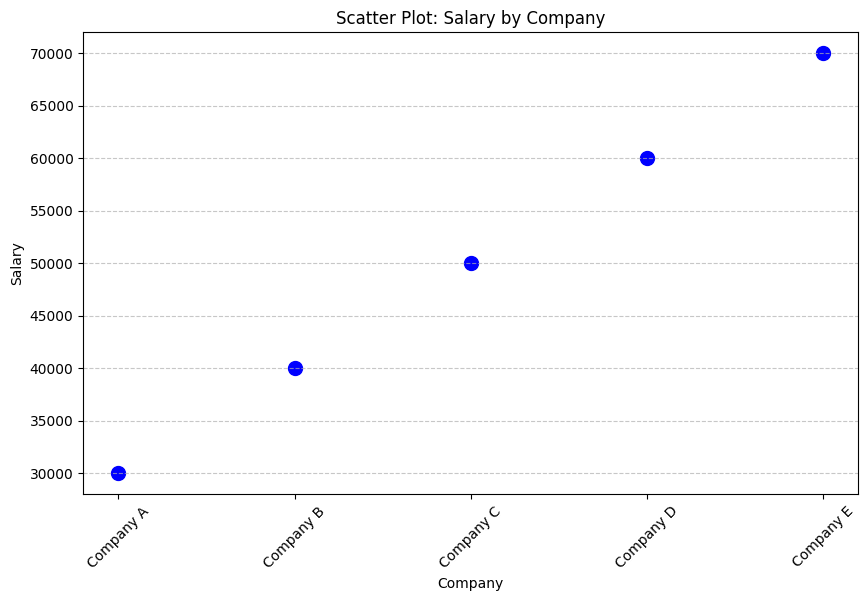

In [ ]:
# Sample data (replace this with your actual dataset)
data = {
    "Company": ["Company A", "Company B", "Company C", "Company D", "Company E"],
    "Salary": [30000, 40000, 50000, 60000, 70000]
}

plt.figure(figsize=(10, 6))
plt.scatter(df["Company"], df["Salary"], marker='o', color='b', s=100)
plt.xlabel("Company")
plt.ylabel("Salary")
plt.title("Scatter Plot: Salary by Company")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


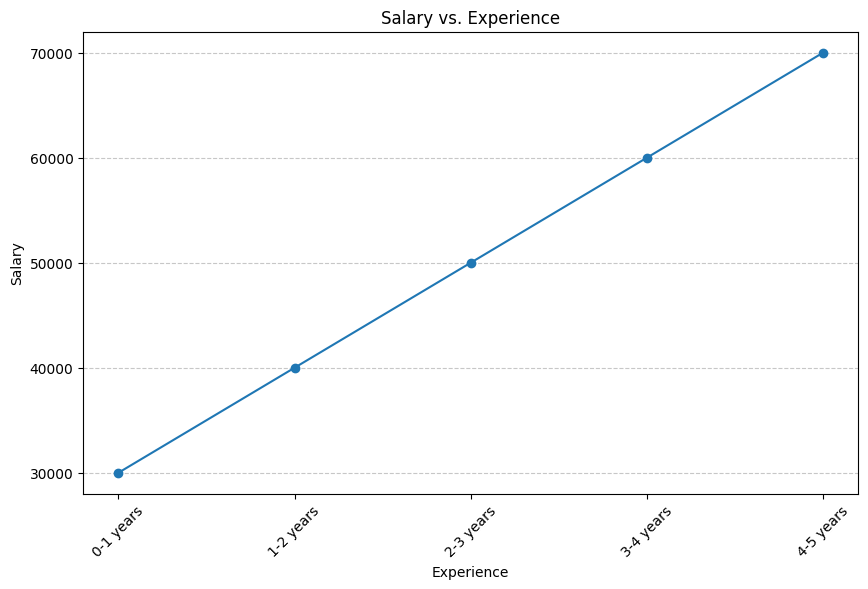

In [ ]:
# Sample data (replace this with your actual dataset)
data = {
    "Experience": ["0-1 years", "1-2 years", "2-3 years", "3-4 years", "4-5 years"],
    "Salary": ["30000", "40000", "50000", "60000", "70000"],
    "Location": ["City A", "City B", "City C", "City D", "City E"]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df["Experience"], df["Salary"], marker='o', linestyle='-')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Salary vs. Experience")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Conclusion

Web scraping is indeed a powerful technique for efficiently extracting data from websites, particularly when dealing with large datasets. This project demonstrated the ability to collect data from multiple pages by automating the process through loops and URL parameter adjustments, making it possible to seamlessly gather information from numerous pages.

The internet contains a vast wealth of data, but much of it is not readily available in easily accessible formats. When data is too extensive to be collected manually, web scraping emerges as a valuable tool for data retrieval and analysis. It enables access to and utilization of online data for various purposes, including research, business intelligence, and decision-making.

Web scraping offers not only time-saving benefits but also the automation of repetitive tasks, making it an indispensable skill for data professionals and researchers. However, it's essential to approach web scraping ethically and responsibly by adhering to website terms of service and legal regulations. This ensures the integrity and legality of the data extraction process, maintaining a balance between data accessibility and the rights of website owners.